In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential , load_model
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

data = pd.read_csv('data\\EURUSD_p15.csv')
# Extract OHLC data
features = data[['Open', 'High', 'Low','volume','spread', 'Close']]

# # Normalize OHLC data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(features)


# Create sequences
sequences = []
for i in range(60, len(normalized_data)):
    sequences.append(normalized_data[i - 60:i])

# Convert sequences to numpy array
sequences = np.array(sequences)

# Separate features and targets
x_train = sequences[:, :, :]  # Features ,the shape is 3d (number_of_samples, timesteps, features)
y_train = sequences[:, :, -1:]  # Targets

model = load_model('the8features_model13.h5')


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=False)


history = model.fit(x_train, y_train, batch_size=1, epochs=10, validation_data=(x_val, y_val))
model.save('the8features_model14.h5')


Epoch 1/10
4352/4352 [==============================] - 1633s 374ms/step - loss: 1.8940e-04 - val_loss: 1.7353e-04
Epoch 2/10
4352/4352 [==============================] - 1626s 374ms/step - loss: 1.6925e-04 - val_loss: 1.6667e-04
Epoch 3/10
4352/4352 [==============================] - 1616s 371ms/step - loss: 1.7005e-04 - val_loss: 1.6028e-04
Epoch 4/10
4352/4352 [==============================] - 1658s 381ms/step - loss: 1.7099e-04 - val_loss: 1.6144e-04
Epoch 5/10
4352/4352 [==============================] - 1705s 392ms/step - loss: 1.6471e-04 - val_loss: 1.6526e-04
Epoch 6/10
4352/4352 [==============================] - 1653s 380ms/step - loss: 1.6591e-04 - val_loss: 1.6265e-04
Epoch 7/10
4352/4352 [==============================] - 1625s 373ms/step - loss: 1.6505e-04 - val_loss: 1.8094e-04
Epoch 8/10
4352/4352 [==============================] - 1700s 391ms/step - loss: 1.6349e-04 - val_loss: 2.0503e-04
Epoch 9/10
4352/4352 [==============================] - 1879s 432ms/step - loss:

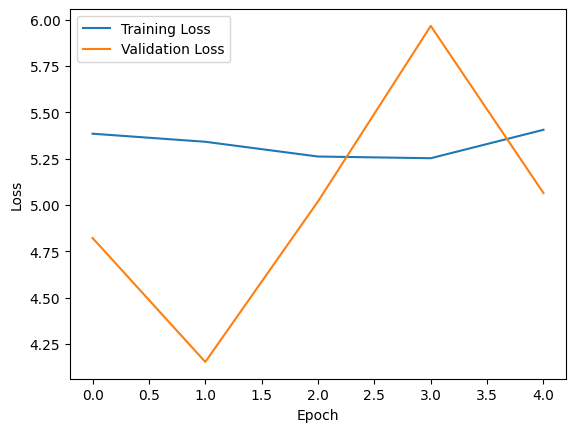

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


loss = [5.3845 ,5.3410 ,5.2613 ,5.2522,5.4057]
val_loss = [4.8215 ,4.1523, 5.0192,5.9665,5.0641]

# Create data frame
df = pd.DataFrame({

    "loss": loss,
    "val_loss": val_loss
})
history= df    

plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import os
os.system("shutdown /s /t 0")  # Shutdown immediately

